In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #Para poder procesar Male y Female como valores enteros

In [218]:
naranja = '#FF4500'
amarillo = '#FFA500'
verde = '#6B8E23'
azul = '#84A5BA'

In [219]:
df_brainstroke = pd.read_csv("./data/brain_stroke.csv")

In [220]:
# Covertir los strings en números para poder contarlos
labelencoder = LabelEncoder()
for column in df_brainstroke.select_dtypes(include=['object']).columns:
    df_brainstroke[column] = labelencoder.fit_transform(df_brainstroke[column])

In [221]:
# Primero busco los pacientes que han sufrido de ACVs y los que no
stroke = df_brainstroke[df_brainstroke['stroke'] == 1]
no_stroke = df_brainstroke[df_brainstroke['stroke'] == 0]

# Segundo, identifico y separo por los pacientes que previamente han sufrido problemas cardíacos y los que no
heart_disease = stroke[stroke['heart_disease'] == 1]
no_heart_disease = stroke[stroke['heart_disease'] == 0]

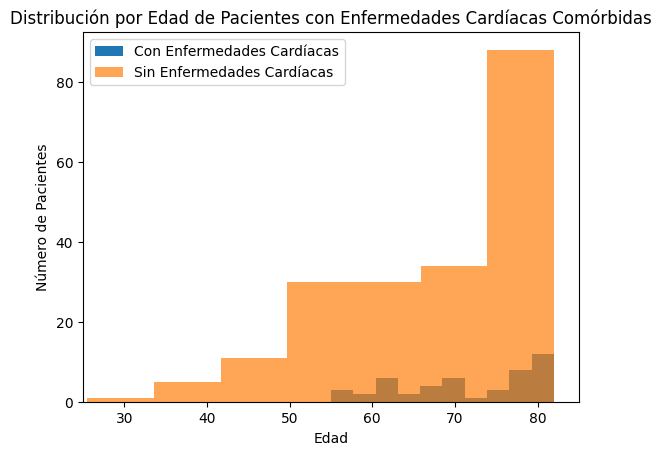

In [222]:
# Distribución por edad de las personas con y sin enfermedades cardíacas que han sufrido ACVs
plt.hist(heart_disease['age'], label='Con Enfermedades Cardíacas')
plt.hist(no_heart_disease['age'], alpha=0.7, label='Sin Enfermedades Cardíacas')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.legend(loc='upper left')
plt.xlim((25,85))
plt.title('Distribución por Edad de Pacientes con Enfermedades Cardíacas Comórbidas')
plt.show()

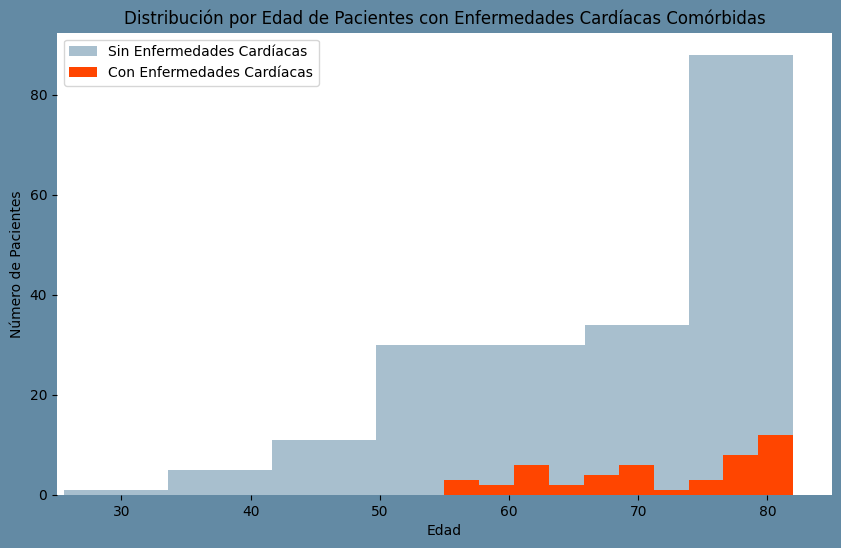

In [223]:
plt.figure(figsize=(10, 6), facecolor='#638AA4')
ax = plt.gca()

ax.hist(no_heart_disease['age'], alpha=0.7, label='Sin Enfermedades Cardíacas', color=azul, edgecolor='none')
ax.hist(heart_disease['age'], label='Con Enfermedades Cardíacas', color=naranja, edgecolor='none')

ax.set_xlabel('Edad')
ax.set_ylabel('Número de Pacientes')
ax.set_title('Distribución por Edad de Pacientes con Enfermedades Cardíacas Comórbidas')

ax.set_xlim((25, 85))

ax.legend(loc='upper left')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

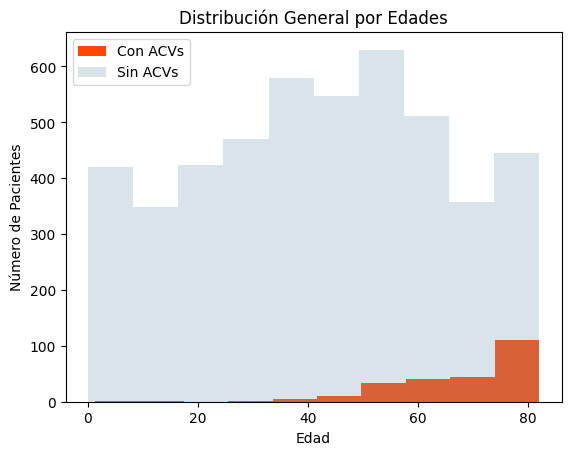

In [224]:
# Distribución por edad de los pacientes del Dataset
plt.hist(stroke['age'], color=naranja, label='Con ACVs')
plt.hist(no_stroke['age'], alpha=0.3, label='Sin ACVs', color=azul)
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.legend(loc='upper left')
plt.title('Distribución General por Edades')
plt.show()

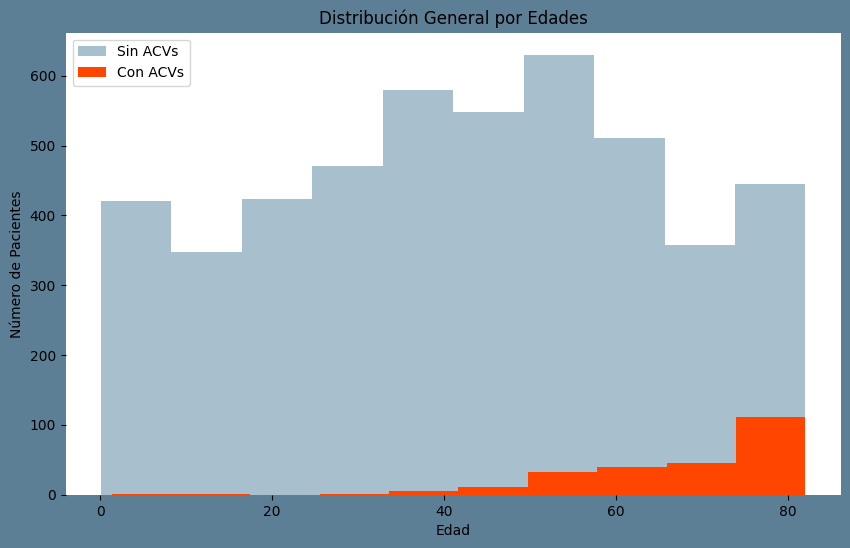

In [225]:
plt.figure(figsize=(10, 6), facecolor='#5D7F96')
ax = plt.gca()

ax.hist(no_stroke['age'], alpha=0.7, label='Sin ACVs', color=azul, edgecolor='none')
ax.hist(stroke['age'], color=naranja, label='Con ACVs', edgecolor='none')

ax.set_xlabel('Edad')
ax.set_ylabel('Número de Pacientes')
ax.set_title('Distribución General por Edades')

ax.legend(loc='upper left')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

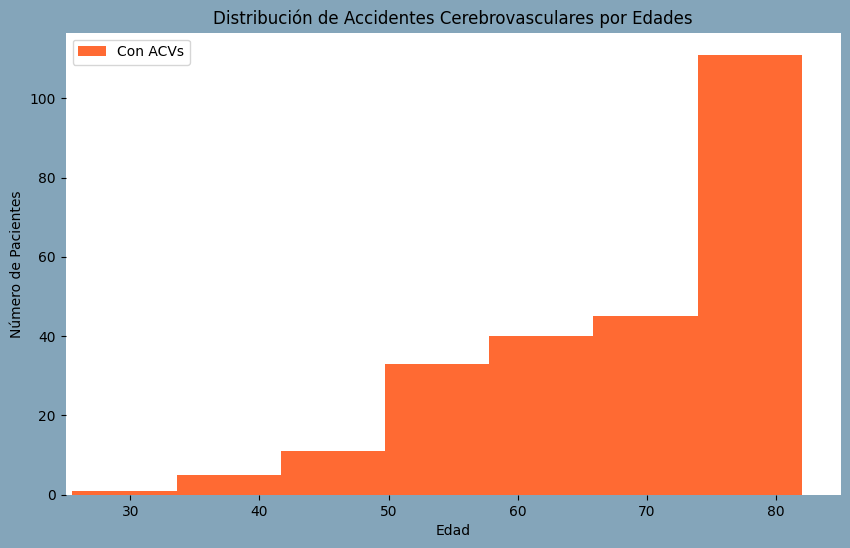

In [227]:
plt.figure(figsize=(10, 6), facecolor='#84A5BA')
ax = plt.gca() 

ax.hist(stroke['age'], color=naranja, edgecolor='none', alpha=0.8)

ax.set_xlabel('Edad')
ax.set_ylabel('Número de Pacientes')
ax.set_title('Distribución de Accidentes Cerebrovasculares por Edades')

ax.set_xlim((25, 85))

ax.legend(['Con ACVs'], loc='upper left')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

In [228]:
# plt.figure(figsize=(10, 6))
# sns.histplot(stroke['bmi'], bins=30, kde=True, color=amarillo)
# plt.title('Distribución de IMC en Pacientes con ACV')
# plt.xlabel('Índice de Masa Corporal')
# plt.ylabel('Frecuencia')
# plt.show()

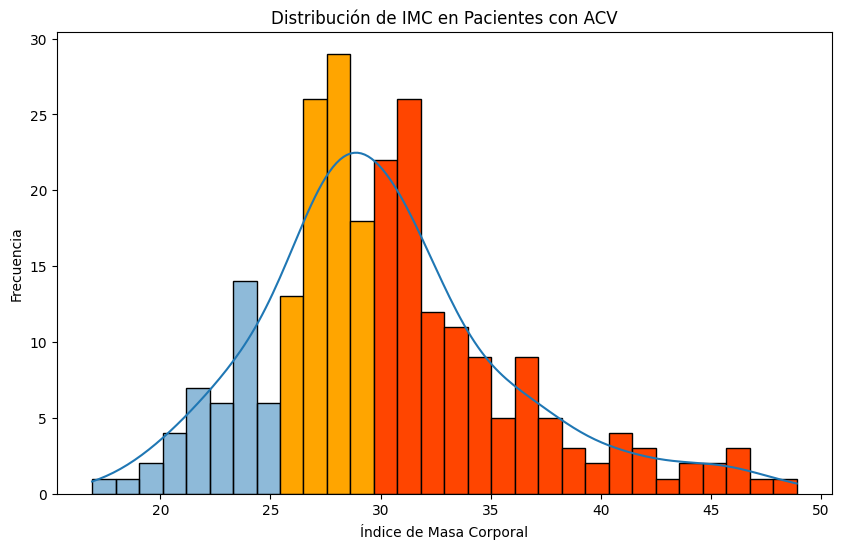

In [229]:
# Distribución por Índice de masa corporal
sobrepeso = 25
obesidad = 30

plt.figure(figsize=(10, 6))
hist = sns.histplot(stroke['bmi'], bins=30, kde=True)

for patch in hist.patches:
    x = patch.get_x() + patch.get_width() / 2
    
    if x > sobrepeso and x < obesidad:
        patch.set_facecolor(amarillo)
        
    elif x > obesidad:
        patch.set_facecolor(naranja)

plt.title('Distribución de IMC en Pacientes con ACV')
plt.xlabel('Índice de Masa Corporal')
plt.ylabel('Frecuencia')
plt.show()

In [230]:
# plt.figure(figsize=(10, 6))
# sns.histplot(stroke['avg_glucose_level'], bins=30, kde=True)
# plt.title('Distribución por Glucosa en Pacientes con ACV')
# plt.xlabel('Niveles de Glucosa en Sangre')
# plt.ylabel('Frecuencia')
# plt.show()

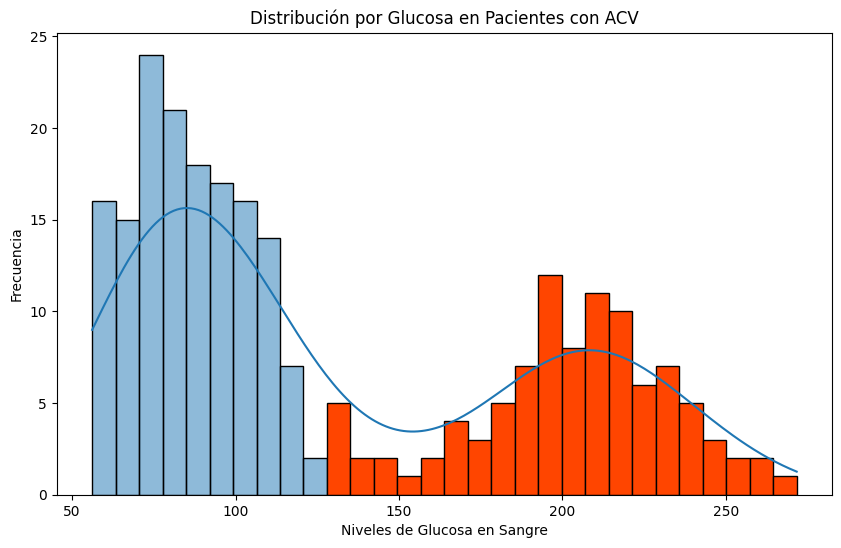

In [231]:
# Distribución por glucosa
umbral_glucose = 125

plt.figure(figsize=(10, 6))
hist = sns.histplot(stroke['avg_glucose_level'], bins=30, kde=True)

for patch in hist.patches:
    x = patch.get_x() + patch.get_width() / 2
    
    if x > umbral_glucose:
        patch.set_facecolor(naranja)

plt.title('Distribución por Glucosa en Pacientes con ACV')
plt.xlabel('Niveles de Glucosa en Sangre')
plt.ylabel('Frecuencia')
plt.show()

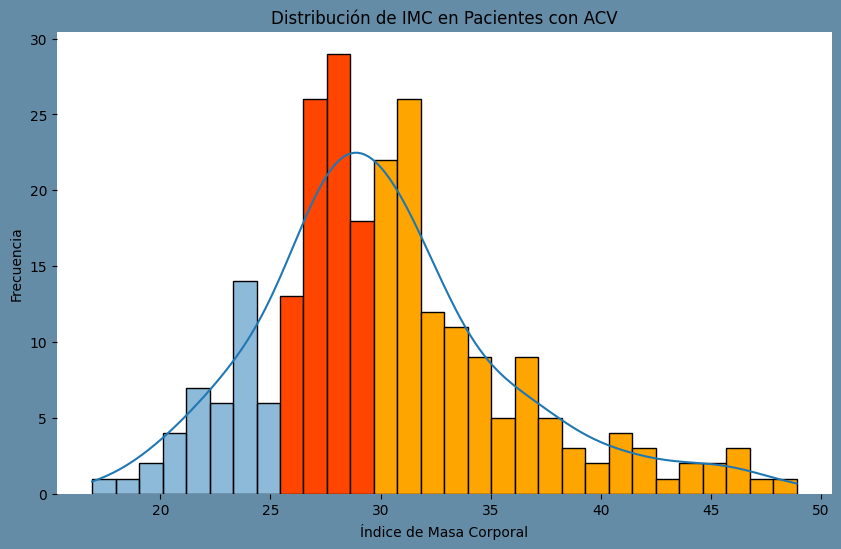

In [232]:
sobrepeso = 25
obesidad = 30

fig, ax = plt.subplots(figsize=(10, 6))
hist = sns.histplot(stroke['bmi'], bins=30, kde=True, ax=ax)

for patch in hist.patches:
    x = patch.get_x() + patch.get_width() / 2
    
    if x > sobrepeso and x < obesidad:
        patch.set_facecolor(naranja)
        
    elif x > obesidad:
        patch.set_facecolor(amarillo)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('#648CA7')

plt.title('Distribución de IMC en Pacientes con ACV')
plt.xlabel('Índice de Masa Corporal')
plt.ylabel('Frecuencia')
plt.show()

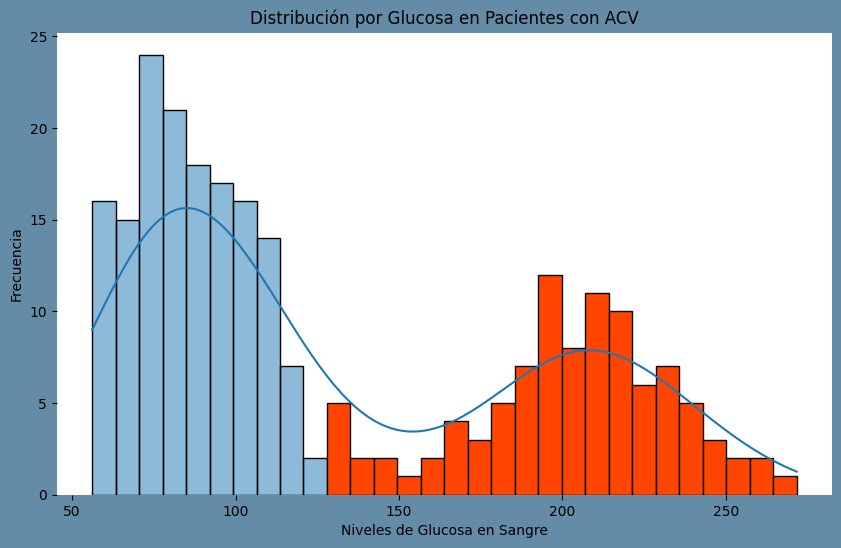

In [233]:
umbral_glucose = 125

fig, ax = plt.subplots(figsize=(10, 6))
hist = sns.histplot(stroke['avg_glucose_level'], bins=30, kde=True, ax=ax)

for patch in hist.patches:
    x = patch.get_x() + patch.get_width() / 2
    
    if x > umbral_glucose:
        patch.set_facecolor(naranja)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('#648CA7')

plt.title('Distribución por Glucosa en Pacientes con ACV')
plt.xlabel('Niveles de Glucosa en Sangre')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\gabod\AppData\Local\Temp\ipykernel_14108\3592208276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['hypertension'] = stroke['hypertension'].replace({0: 'No', 1: 'Sí'})


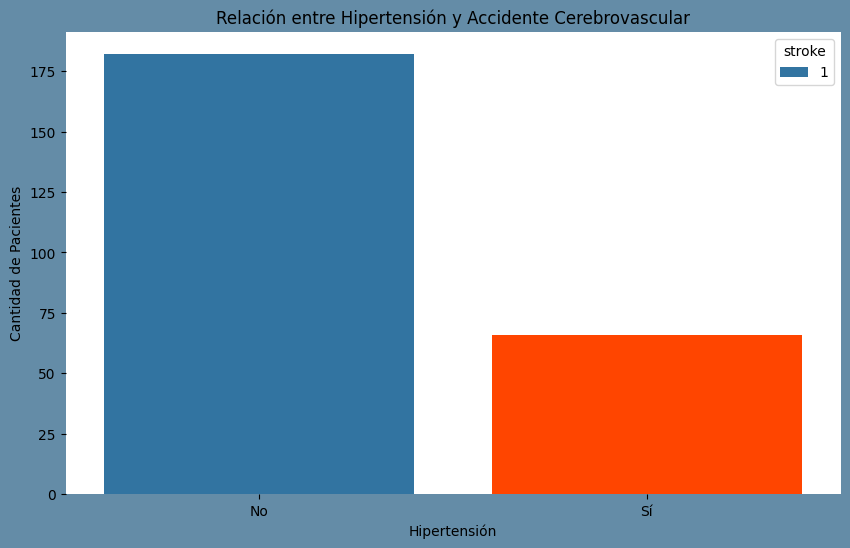

In [235]:
stroke['hypertension'] = stroke['hypertension'].replace({0: 'No', 1: 'Sí'})

fig, ax = plt.subplots(figsize=(10, 6))
countplot = sns.countplot(data=stroke, x='hypertension', hue='stroke', ax=ax)

for patch in countplot.patches:
    if patch.get_x() + patch.get_width() / 2 > 0.5:
        patch.set_facecolor(naranja)

# Quito las líneas del borde exterior del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('#648CA7')

plt.title('Relación entre Hipertensión y Accidente Cerebrovascular')
plt.xlabel('Hipertensión')
plt.ylabel('Cantidad de Pacientes')
plt.show()

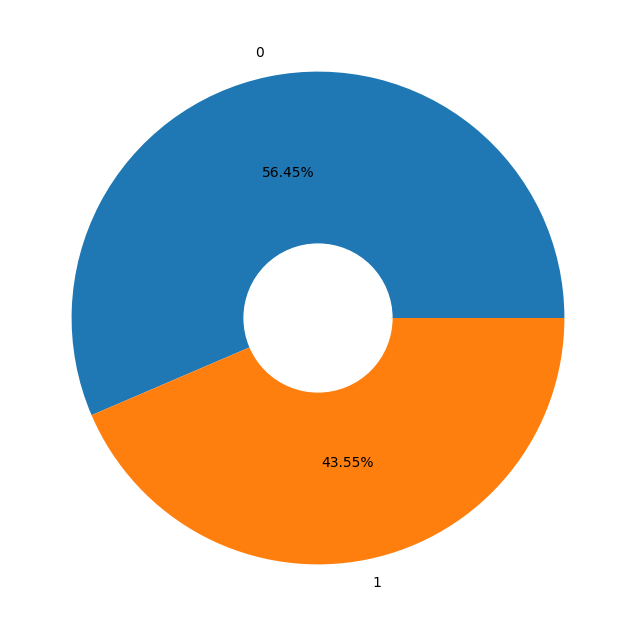

In [236]:
# Piechart de pacientes con ACV por género
sex = stroke["gender"].value_counts()
 
my_circle=plt.Circle( (0,0),
                     0.3,
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(sex.values,
        labels=sex.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

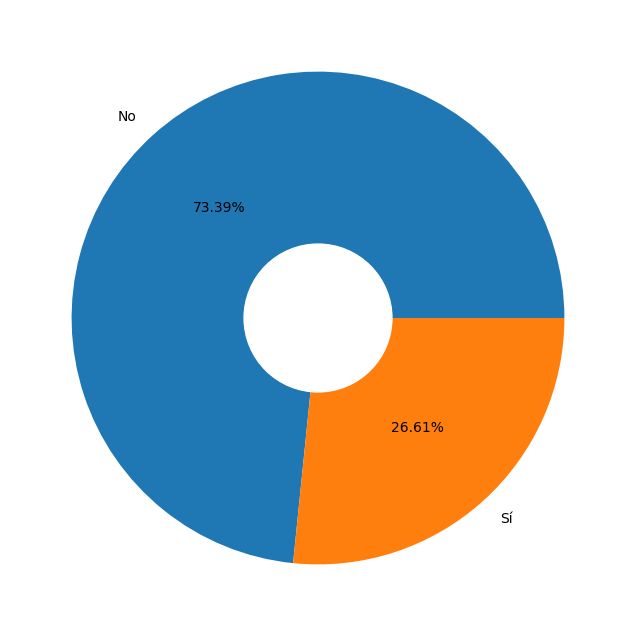

In [237]:
# Piechart de pacientes con ACV que sufren de hipertensión
hypertension = stroke["hypertension"].value_counts()
 
my_circle=plt.Circle( (0,0),
                     0.3,
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(hypertension.values,
        labels=hypertension.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

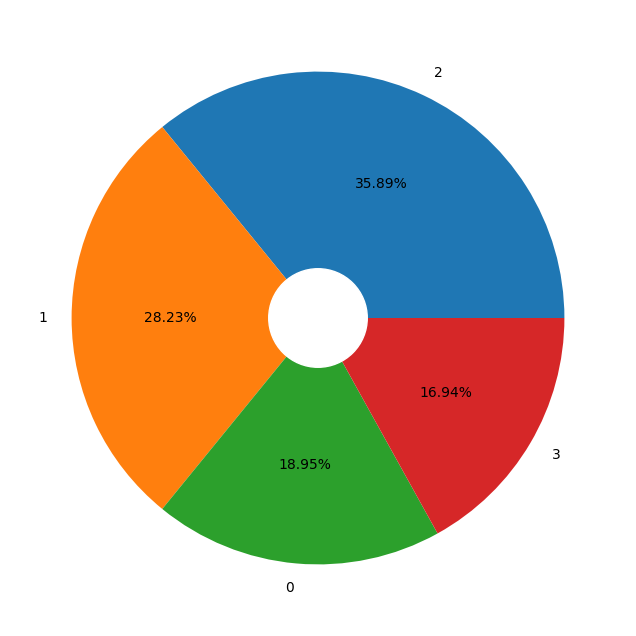

In [238]:
# Distribución de pacientes con ACV por su estatus actual de tabaquismo
data = stroke["smoking_status"].value_counts()
 
my_circle=plt.Circle( (0,0),
                     0.2,
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

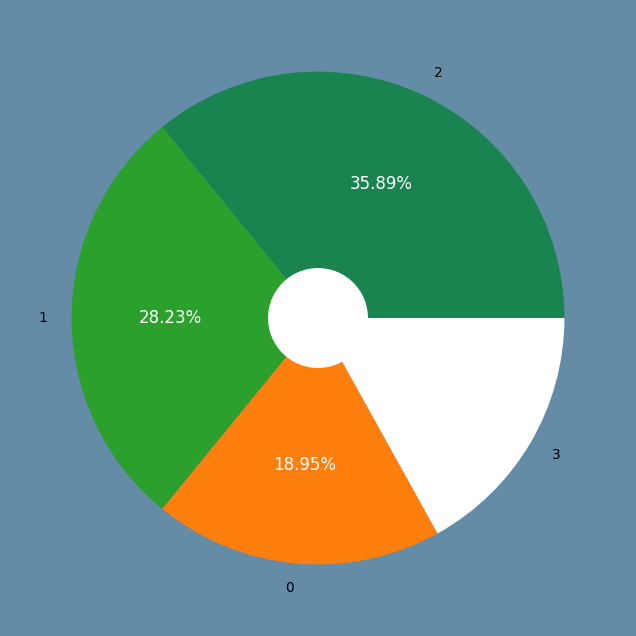

In [272]:
data = stroke["smoking_status"].value_counts()
my_circle = plt.Circle((0, 0), 0.2, color='white')

colors = ['#198450', '#2ca02c', '#ff7f0e', 'white']

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)

ax.add_artist(my_circle)

fig.patch.set_facecolor('#648CA7')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.show()

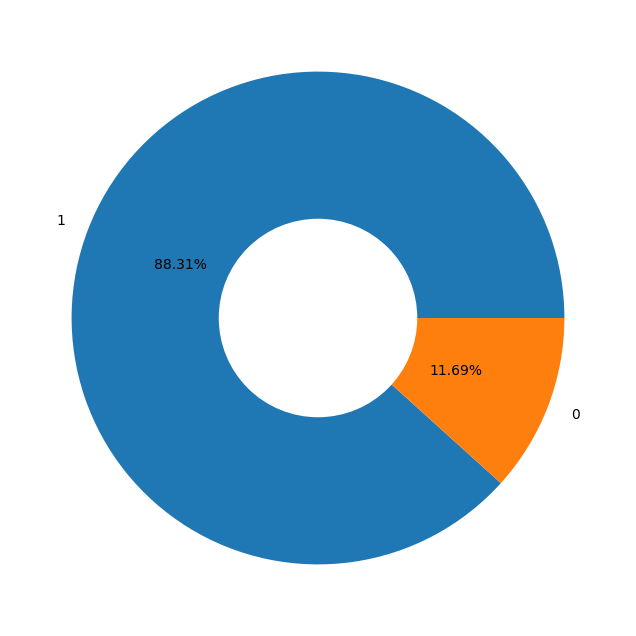

In [240]:
# Piechart de pacientes con ACV por estatus marital
data = stroke["ever_married"].value_counts()
 
my_circle=plt.Circle( (0,0),
                     0.4,
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

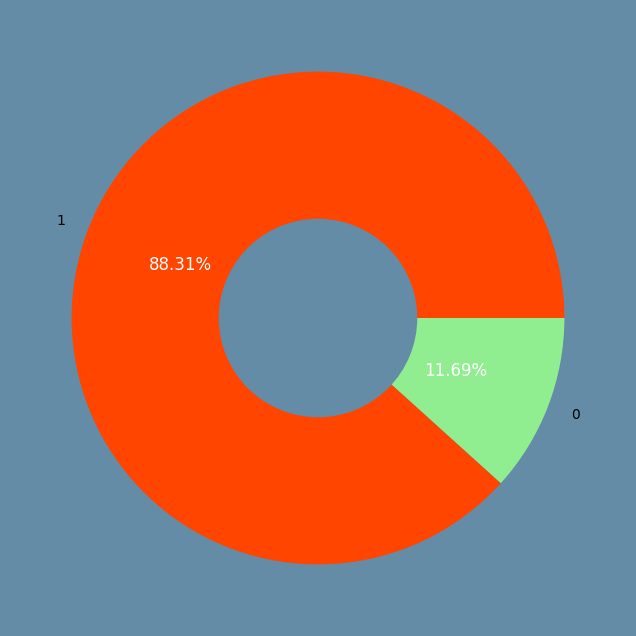

In [274]:
data = stroke["ever_married"].value_counts()
my_circle = plt.Circle((0, 0), 0.4, color='#648CA7')

fig, ax = plt.subplots(figsize=(8, 8))
colores_matrimonio = [naranja,'#90EE90']

wedges, texts, autotexts = ax.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colores_matrimonio)

ax.add_artist(my_circle)

fig.patch.set_facecolor('#648CA7')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.show()

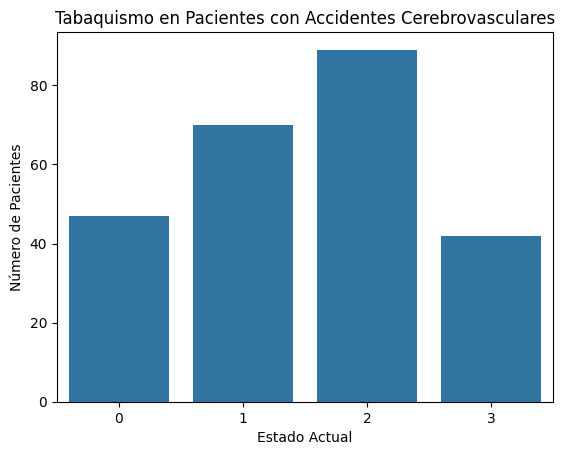

In [242]:
# Represento el impacto del tabaquismo en los pacientes con ACVs. En un piechart creo que se visualiza mejor (No la usaré)
sns.countplot(data=stroke, x='smoking_status')
plt.xlabel('Estado Actual')
plt.ylabel('Número de Pacientes')
plt.title('Tabaquismo en Pacientes con Accidentes Cerebrovasculares')
plt.show()

#### Se considera sobrepeso a partir de 25 IMC y a partir de 30 sobrepeso

In [243]:
sobrepeso_stroke = stroke[stroke['bmi'] > 25]
peso_no_stroke = df_brainstroke['bmi']

In [244]:
married = df_brainstroke[df_brainstroke["ever_married"] == "Yes"]
married.count()

stroke_by_marriage = married[married["stroke"] == 1]
stroke_by_marriage.count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

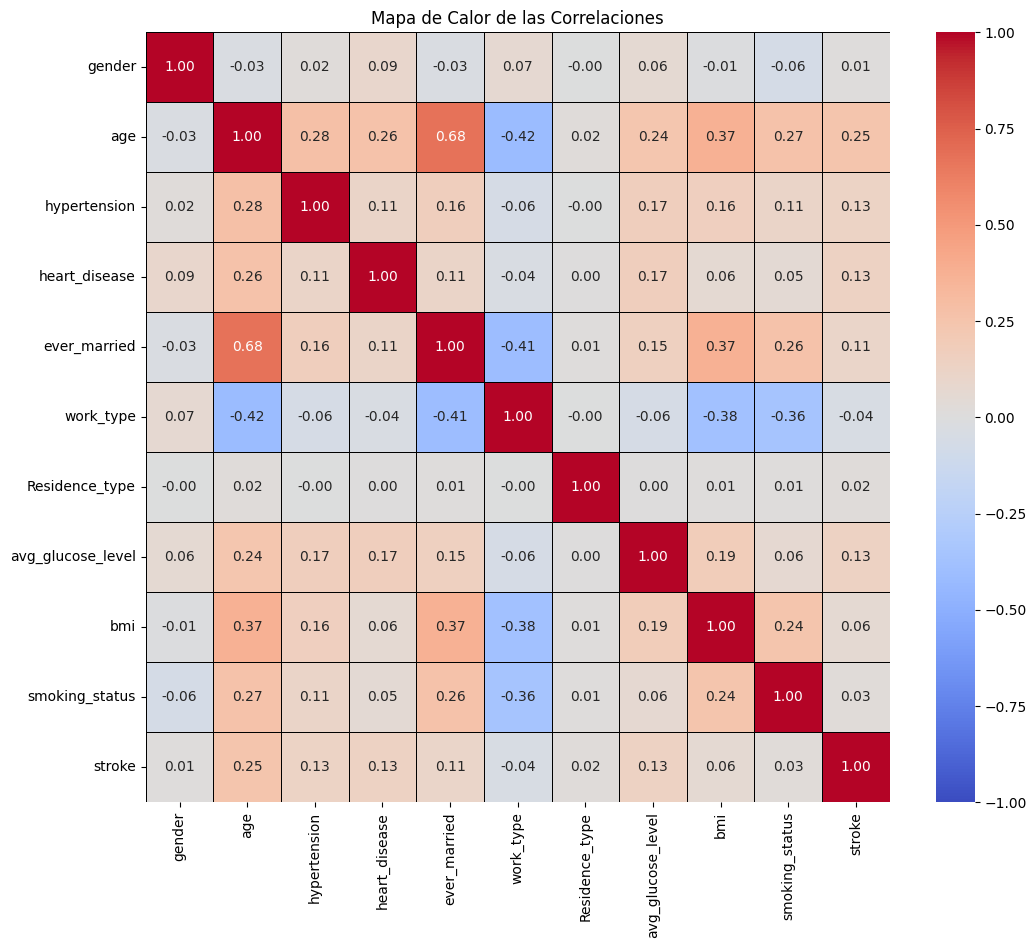

In [252]:
correlaciones = df_brainstroke.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

plt.title('Mapa de Calor de las Correlaciones')
plt.show()

C:\Users\gabod\AppData\Local\Temp\ipykernel_14108\4050197202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['Residence_type'] = stroke['Residence_type'].replace({0: 'Campo', 1: 'Ciudad'})


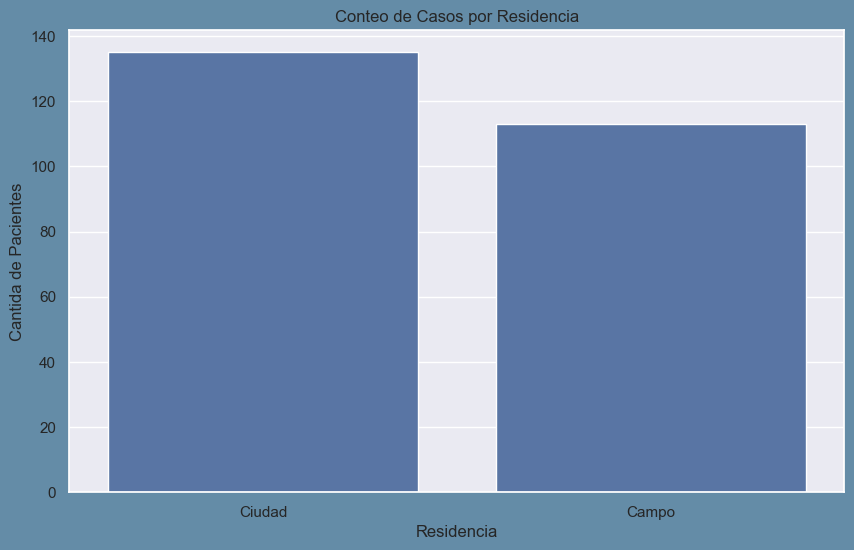

In [308]:
# Lugar de Residencia
stroke['Residence_type'] = stroke['Residence_type'].replace({0: 'Campo', 1: 'Ciudad'})
sns.set(rc={'figure.facecolor':'#648CA7'})



plt.figure(figsize=(10, 6))
sns.countplot(data=stroke, x='Residence_type')
plt.title('Conteo de Casos por Residencia')
plt.xlabel('Residencia')
plt.ylabel('Cantida de Pacientes')
plt.show()

C:\Users\gabod\AppData\Local\Temp\ipykernel_14108\1391042122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke['work_type'] = stroke['work_type'].replace({0: 'Gobierno', 1: 'Sector Privado', 2:'Autónomo'})


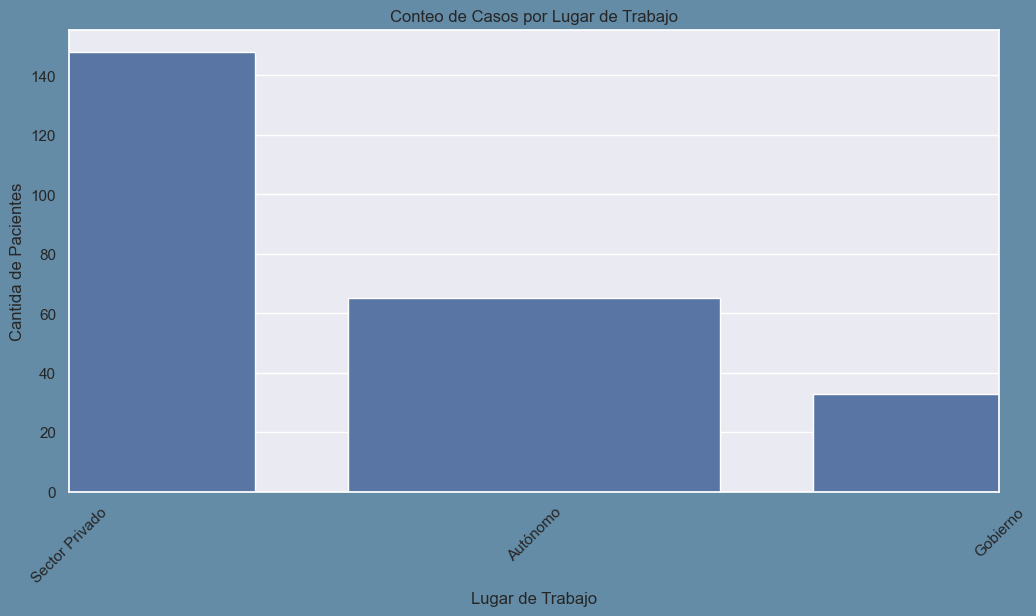

In [309]:
# Tipo de Trabajo
stroke['work_type'] = stroke['work_type'].replace({0: 'Gobierno', 1: 'Sector Privado', 2:'Autónomo'})

sns.set(rc={'figure.facecolor':'#648CA7'})
plt.figure(figsize=(12, 6))
sns.countplot(data=stroke, x='work_type')
plt.title('Conteo de Casos por Lugar de Trabajo')
plt.xlabel('Lugar de Trabajo')
plt.ylabel('Cantida de Pacientes')
plt.xticks(rotation=45)
plt.xlim((0,2))
plt.show()